# Task is to first do min max scaling ,then standard scaling and then validate the model using k fold cross validation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
Churn = pd.read_csv('D:/iAnalyst/Machine Learning/Logistic Regression/Churn_Modelling.csv')
df=Churn.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Exploratory Data Analysis

In [4]:
Churn.isnull() 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

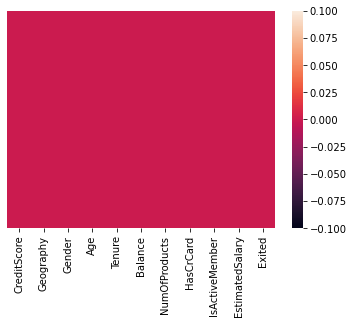

In [22]:
sns.heatmap(df.isnull(),yticklabels=False)#,cbar=True,cmap='viridis')   #no missing cases

<AxesSubplot:xlabel='Exited', ylabel='count'>

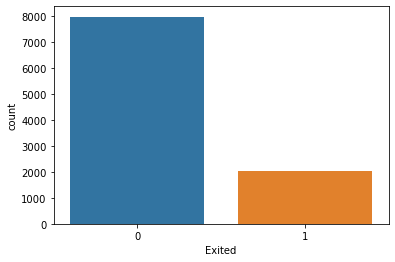

In [10]:
sns.countplot(x='Exited',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

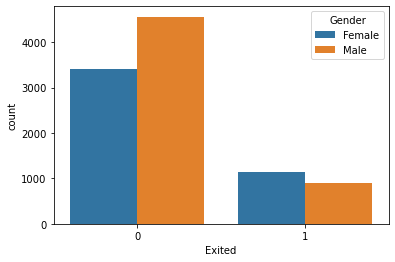

In [11]:
sns.countplot(x='Exited',hue='Gender',data=df)

<AxesSubplot:xlabel='Exited', ylabel='count'>

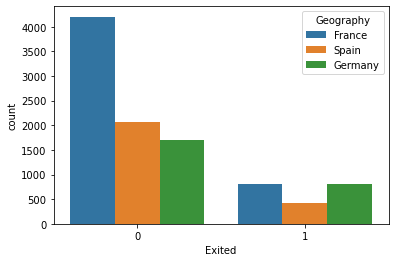

In [12]:
sns.countplot(x='Exited', hue='Geography', data=df)

Data cleaning

In [13]:
to_drop=['RowNumber','CustomerId','Surname']   #not needed
df=df.drop(to_drop,axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Gender', ylabel='Balance'>

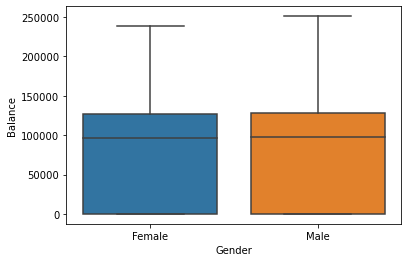

In [14]:
sns.boxplot(x='Gender',y='Balance',data=df)

<AxesSubplot:xlabel='Geography', ylabel='Balance'>

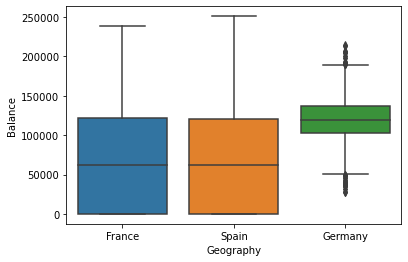

In [15]:
sns.boxplot(x='Geography',y='Balance',data=df)

##Using min max feature engineering.

##using it for columns which have huge numbers such as credit score, balance and estimated salary

In [16]:
minmax=['CreditScore','Balance','EstimatedSalary']

for i in minmax:
    df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [19]:
df.EstimatedSalary.head()

0    0.506735
1    0.562709
2    0.569654
3    0.469120
4    0.395400
Name: EstimatedSalary, dtype: float64

In [21]:
Gender = pd.get_dummies(df['Gender'],drop_first=True)   #It uses one-hot encoding. Convert categorical variable into dummy/indicator variables.
Geo = pd.get_dummies(df['Geography'],drop_first=True)   #we use drop first as we delete the first column generated. If we get male=0 then it is known that person is female. so no need for another column to mention female=1. Hence deleting this unnecessary coln.

In [23]:
Geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [24]:
df.drop(['Gender','Geography'],axis=1,inplace=True)  #deleting the existing colmns and adding the one-hot encoded ones.
pd.concat([df,Gender,Geo],axis=1)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,0.538,42,2,0.000000,1,1,1,0.506735,1,0,0,0
1,0.516,41,1,0.334031,1,0,1,0.562709,0,0,0,1
2,0.304,42,8,0.636357,3,1,0,0.569654,1,0,0,0
3,0.698,39,1,0.000000,2,0,0,0.469120,0,0,0,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,39,5,0.000000,2,1,0,0.481341,0,1,0,0
9996,0.332,35,10,0.228657,1,1,1,0.508490,0,1,0,0
9997,0.718,36,7,0.000000,1,0,1,0.210390,1,0,0,0
9998,0.844,42,3,0.299226,2,1,0,0.464429,1,1,1,0


In [25]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,42,2,0.000000,1,1,1,0.506735,1
1,0.516,41,1,0.334031,1,0,1,0.562709,0
2,0.304,42,8,0.636357,3,1,0,0.569654,1
3,0.698,39,1,0.000000,2,0,0,0.469120,0
4,1.000,43,2,0.500246,1,1,1,0.395400,0


In [26]:
##BUILDING A LOGISTIC REGRESSION MODEL

In [27]:
##TRAIN TEST SPLIT

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), 
                                                    df['Exited'], test_size=0.20, 
                                                    random_state=111)

Training and PRedicting

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\Vineet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
logmodel.coef_

array([[-0.34503197,  0.07394168, -0.02105154,  1.1895168 , -0.0678038 ,
        -0.02915748, -1.10419472,  0.06507739]])

In [34]:
predictions = logmodel.predict(X_test) 
#predictions = logmodel.predict_proba(X_test)

In [35]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [36]:
pd.crosstab(predictions,y_test)

Exited,0,1
row_0,,
0,1547,340
1,45,68


Evaluation

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,predictions))

[[1547   45]
 [ 340   68]]


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1592
           1       0.60      0.17      0.26       408

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.76      2000



In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
logit_roc_auc

0.5692001675041876

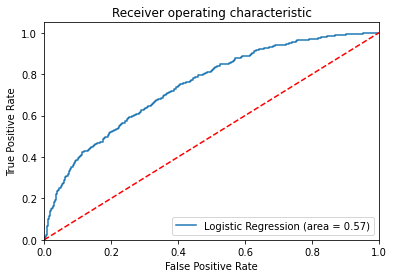

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [42]:
roc_auc_score(y_test, logmodel.predict(X_test))

0.5692001675041876

In [43]:
logmodel.predict_proba(X_test)

array([[0.89821138, 0.10178862],
       [0.55189901, 0.44810099],
       [0.95982522, 0.04017478],
       ...,
       [0.68178309, 0.31821691],
       [0.905624  , 0.094376  ],
       [0.95877614, 0.04122386]])

In [44]:
logmodel.predict_proba(X_test)[:,1]

array([0.10178862, 0.44810099, 0.04017478, ..., 0.31821691, 0.094376  ,
       0.04122386])

In [45]:
logmodel.predict_proba(X_test)[:,1]>0.4

array([False,  True, False, ..., False, False, False])

In [76]:
logical=logmodel.predict_proba(X_test)[:,1]>0.21
logical

array([False,  True, False, ...,  True, False, False])

In [77]:
pred=[0]*np.size(logical)
for i in np.arange(0,np.size(logical)):
        if logical[i]==True:
            pred[i]=1   

In [78]:
roc_auc_score(y_test,pred) 

0.6673071238545669

In [79]:
print(confusion_matrix(y_test,pred))

[[1118  474]
 [ 150  258]]


In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1592
           1       0.35      0.63      0.45       408

    accuracy                           0.69      2000
   macro avg       0.62      0.67      0.62      2000
weighted avg       0.77      0.69      0.71      2000



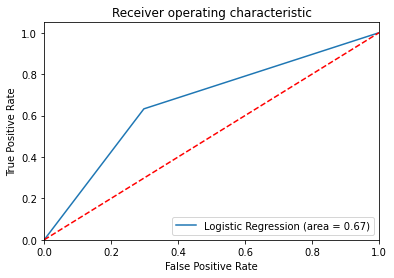

In [81]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, pred)
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()